<a href="https://colab.research.google.com/github/hierma/hierma/blob/main/Tugas_NLP_Erma_Wati_analisa_sentimen_tokopedia_(mini_project_NLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import dataset yang telah dilakukan text preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pip install openpyxl

In [3]:
data = pd.read_excel("/content/tokped_text.xlsx", index_col=0)

data.head()

,Nama_Produk,Akun,Ulasan,rate,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean
1,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Stephanus,keduakali beli tapi sayang yang kedua lambat d...,3,"['keduakali', 'beli', 'tapi', 'sayang', 'yang'...","['kedua kali', 'beli', 'tapi', 'sayang', 'yang...","['kedua kali', 'beli', 'sayang', 'lambat', 're...","['dua kali', 'beli', 'sayang', 'lambat', 'resp...",dua kali beli sayang lambat respon order pagi ...
2,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Yati,bagus pengiriman cepat,5,"['bagus', 'pengiriman', 'cepat']","['bagus', 'pengiriman', 'cepat']","['bagus', 'pengiriman', 'cepat']","['bagus', 'kirim', 'cepat']",bagus kirim cepat
3,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Husin,barang sesuai pesanan,4,"['barang', 'sesuai', 'pesanan']","['barang', 'sesuai', 'pesanan']","['barang', 'sesuai', 'pesanan']","['barang', 'sesuai', 'pesan']",barang sesuai pesan
4,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Febby,agak panas pas dipakai,5,"['agak', 'panas', 'pas', 'dipakai']","['sedikit', 'panas', 'saat', 'dipakai']","['panas', 'dipakai']","['panas', 'pakai']",panas pakai
5,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Rahmat,barang sesuai permintaan dan bagus namun komun...,3,"['barang', 'sesuai', 'permintaan', 'dan', 'bag...","['barang', 'sesuai', 'permintaan', 'dan', 'bag...","['barang', 'sesuai', 'permintaan', 'bagus', 'k...","['barang', 'sesuai', 'minta', 'bagus', 'komuni...",barang sesuai minta bagus komunikasi jual beli...


# Labeling

Pembagian data menjadi data sentimen berlabel positif dan negatif dengan angka 1 untuk positif dan angka 0 untuk negatif. Pengklasifikasian ini dilakukan pada ulasan yang memiliki rating 4 dan 5 sebagai sentimen positif dan rating 3 sampai 1 sebagai sentimen negatif.

In [4]:
label = []
for index, row in data.iterrows():
    if row["rate"] == 5 or row["rate"] == 4:
        label.append(1)
    else:
        label.append(0)

data["label"] = label

data

,Nama_Produk,Akun,Ulasan,rate,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label
1,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Stephanus,keduakali beli tapi sayang yang kedua lambat d...,3,"['keduakali', 'beli', 'tapi', 'sayang', 'yang'...","['kedua kali', 'beli', 'tapi', 'sayang', 'yang...","['kedua kali', 'beli', 'sayang', 'lambat', 're...","['dua kali', 'beli', 'sayang', 'lambat', 'resp...",dua kali beli sayang lambat respon order pagi ...,0
2,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Yati,bagus pengiriman cepat,5,"['bagus', 'pengiriman', 'cepat']","['bagus', 'pengiriman', 'cepat']","['bagus', 'pengiriman', 'cepat']","['bagus', 'kirim', 'cepat']",bagus kirim cepat,1
3,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Husin,barang sesuai pesanan,4,"['barang', 'sesuai', 'pesanan']","['barang', 'sesuai', 'pesanan']","['barang', 'sesuai', 'pesanan']","['barang', 'sesuai', 'pesan']",barang sesuai pesan,1
4,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Febby,agak panas pas dipakai,5,"['agak', 'panas', 'pas', 'dipakai']","['sedikit', 'panas', 'saat', 'dipakai']","['panas', 'dipakai']","['panas', 'pakai']",panas pakai,1
5,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Rahmat,barang sesuai permintaan dan bagus namun komun...,3,"['barang', 'sesuai', 'permintaan', 'dan', 'bag...","['barang', 'sesuai', 'permintaan', 'dan', 'bag...","['barang', 'sesuai', 'permintaan', 'bagus', 'k...","['barang', 'sesuai', 'minta', 'bagus', 'komuni...",barang sesuai minta bagus komunikasi jual beli...,0
...,...,...,...,...,...,...,...,...,...,...
296,Buy 1 Get 1 - Masker Primero - Sachet,a***a,barang yg dikirim tdk sesuai deskripsi tidak t...,1,"['barang', 'yg', 'dikirim', 'tdk', 'sesuai', '...","['barang', 'yang', 'dikirim', 'tidak', 'sesuai...","['barang', 'dikirim', 'sesuai', 'deskripsi', '...","['barang', 'kirim', 'sesuai', 'deskripsi', 'te...",barang kirim sesuai deskripsi tera ijin kemenk...,0
297,Buy 1 Get 1 - Masker Primero - Sachet,Teguh,kotaknya penyok disana sini mngkn dr pihak exp...,5,"['kotaknya', 'penyok', 'disana', 'sini', 'mngk...","['kotaknya', 'penyok', 'disana', 'sini', 'mngk...","['kotaknya', 'penyok', 'disana', 'mngkn', 'exp...","['kotak', 'penyok', 'sana', 'mngkn', 'expediai']",kotak penyok sana mngkn expediai,1
298,Buy 1 Get 1 - Masker Primero - Sachet,F***a,barang sesuai dan kualitas baik cuma kardusnya...,5,"['barang', 'sesuai', 'dan', 'kualitas', 'baik'...","['barang', 'sesuai', 'dan', 'kualitas', 'baik'...","['barang', 'sesuai', 'kualitas', 'kardusnya', ...","['barang', 'sesuai', 'kualitas', 'kardus', 'pe...",barang sesuai kualitas kardus penyok next time...,1
299,Buy 1 Get 1 - Masker Primero - Sachet,N***a,dapet harga promo jadi murah pengiriman agak l...,5,"['dapet', 'harga', 'promo', 'jadi', 'murah', '...","['dapat', 'harga', 'promo', 'jadi', 'murah', '...","['harga', 'promo', 'murah', 'pengiriman', 'pro...","['harga', 'promo', 'murah', 'kirim', 'promo']",harga promo murah kirim promo,1


In [5]:
data["label"].value_counts()

1    270
0     30
Name: label, dtype: int64

# Menghitung Kata Dengan TF-IDF

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [7]:
Ulasan = data['Ulasan_clean']

In [8]:
Ulasan.isnull().sum()

11

In [9]:
Ulasan = Ulasan.fillna('tidak ada komentar')

In [10]:
#untuk menghitung jumlah kata yang telah di steming
cv = CountVectorizer()
term_fit = cv.fit(Ulasan)

print (len(term_fit.vocabulary_))

468


In [11]:
term_fit.vocabulary_ #mengurutkan berdasarkan urutab abjad kata 

{'abal': 0,
 'ada': 1,
 'admin': 2,
 'affordable': 3,
 'aktif': 4,
 'akurat': 5,
 'alhamdulillah': 6,
 'alias': 7,
 'aman': 8,
 'amanseller': 9,
 'amburadul': 10,
 'an': 11,
 'anak': 12,
 'anakanak': 13,
 'and': 14,
 'andal': 15,
 'anjas': 16,
 'apa': 17,
 'asa': 18,
 'asli': 19,
 'ati': 20,
 'auto': 21,
 'awet': 22,
 'bada': 23,
 'bagus': 24,
 'baguz': 25,
 'bahan': 26,
 'baik': 27,
 'baju': 28,
 'banding': 29,
 'bandung': 30,
 'banget': 31,
 'bangetdapet': 32,
 'banyak': 33,
 'barang': 34,
 'bareng': 35,
 'barokah': 36,
 'bayang': 37,
 'beda': 38,
 'belanja': 39,
 'beli': 40,
 'berat': 41,
 'besar': 42,
 'besi': 43,
 'besok': 44,
 'better': 45,
 'bgtthank': 46,
 'biar': 47,
 'bini': 48,
 'bintang': 49,
 'bolong': 50,
 'bonus': 51,
 'bos': 52,
 'bosssku': 53,
 'box': 54,
 'boxnya': 55,
 'brgnya': 56,
 'brng': 57,
 'btw': 58,
 'bubble': 59,
 'bubblewrap': 60,
 'buka': 61,
 'bunafit': 62,
 'bunda': 63,
 'bungkus': 64,
 'cancel': 65,
 'cashback': 66,
 'cepat': 67,
 'cerita': 68,
 'chatda

In [12]:
#kolom pertama ini berarti jumlah dokumen
#kolom kedua berarti letak katanya
#kolom ketiga hasil dari tf

term_frequency_all = term_fit.transform(Ulasan)
print (term_frequency_all)

  (0, 24)	1
  (0, 34)	1
  (0, 40)	1
  (0, 44)	1
  (0, 100)	1
  (0, 128)	1
  (0, 148)	1
  (0, 167)	1
  (0, 191)	2
  (0, 207)	1
  (0, 293)	1
  (0, 304)	1
  (0, 357)	3
  (0, 374)	1
  (0, 389)	1
  (0, 400)	1
  (1, 24)	1
  (1, 67)	1
  (1, 191)	1
  (2, 34)	1
  (2, 318)	1
  (2, 389)	1
  (3, 305)	1
  (3, 308)	1
  (4, 4)	1
  :	:
  (299, 8)	1
  (299, 17)	1
  (299, 24)	1
  (299, 40)	2
  (299, 59)	1
  (299, 71)	1
  (299, 76)	1
  (299, 107)	1
  (299, 143)	1
  (299, 191)	1
  (299, 200)	2
  (299, 243)	1
  (299, 248)	1
  (299, 253)	1
  (299, 300)	1
  (299, 305)	1
  (299, 307)	1
  (299, 311)	1
  (299, 316)	1
  (299, 336)	1
  (299, 367)	1
  (299, 375)	1
  (299, 421)	1
  (299, 463)	1
  (299, 464)	1


In [13]:
ulasan_tf = Ulasan[1] #memanggil kata pada index ke 1
print (ulasan_tf)

dua kali beli sayang lambat respon order pagi kirim sore respon respon itu kirim besok barang bagus sesuai harga


In [14]:
term_frequency = term_fit.transform([ulasan_tf]) #hanya menampilkan hasil document 1
print (term_frequency)

  (0, 24)	1
  (0, 34)	1
  (0, 40)	1
  (0, 44)	1
  (0, 100)	1
  (0, 128)	1
  (0, 148)	1
  (0, 167)	1
  (0, 191)	2
  (0, 207)	1
  (0, 293)	1
  (0, 304)	1
  (0, 357)	3
  (0, 374)	1
  (0, 389)	1
  (0, 400)	1


In [15]:
dokumen = term_fit.transform(Ulasan) #hasil perhitungan tf idf dalam 1 doc
tfidf_transformer = TfidfTransformer().fit(dokumen)
print (tfidf_transformer.idf_)

tfidf=tfidf_transformer.transform(term_frequency)
print (tfidf) #hasil manual dengan sistem pyhton

[6.01396308 4.22220361 5.60849798 6.01396308 5.60849798 6.01396308
 6.01396308 6.01396308 4.06805294 6.01396308 6.01396308 6.01396308
 5.3208159  6.01396308 6.01396308 6.01396308 5.60849798 6.01396308
 6.01396308 5.09767235 6.01396308 6.01396308 6.01396308 6.01396308
 2.50241765 6.01396308 4.9153508  5.3208159  6.01396308 5.3208159
 6.01396308 3.61606781 6.01396308 6.01396308 2.36330484 5.60849798
 6.01396308 6.01396308 5.3208159  5.09767235 3.27312306 6.01396308
 6.01396308 6.01396308 5.3208159  6.01396308 6.01396308 6.01396308
 6.01396308 6.01396308 6.01396308 4.62766872 6.01396308 6.01396308
 4.76120012 6.01396308 6.01396308 5.60849798 6.01396308 4.76120012
 6.01396308 5.3208159  6.01396308 6.01396308 5.09767235 6.01396308
 6.01396308 2.40304517 6.01396308 6.01396308 6.01396308 5.60849798
 5.60849798 6.01396308 5.60849798 6.01396308 5.3208159  6.01396308
 6.01396308 6.01396308 5.60849798 6.01396308 6.01396308 5.60849798
 5.09767235 5.60849798 4.22220361 6.01396308 6.01396308 6.01396

# NLP

In [16]:
data_label = data[["Nama_Produk", "Akun", "Ulasan_clean", "label"]]

In [17]:
data_label["Ulasan_clean"] = data_label["Ulasan_clean"].fillna("tidak ada komentar")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
data_label.to_excel("data_label.xlsx")

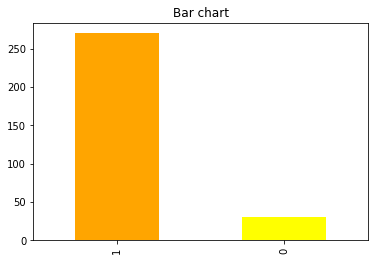

In [19]:
sentimen_data=pd.value_counts(data_label["label"], sort= True)
sentimen_data.plot(kind= 'bar', color= ["orange", "yellow"])
plt.title('Bar chart')
plt.show()

Dapat dilihat bahwa isi ulasan produk lebih banyak pada label sentimen 1 atau ulasan dengan rating postitif ini berarti pelanggan yang menggunakan marketplace Tokopedia dan melakukan transaksi pembelian pada produk masker Kesehatan merasa puas bertansaksi di marketplace Tokopedia dan prosuk masker Kesehatan sehingga memberikan feedback atau ulasan komentar lebih banyak yang positif.

In [20]:
from wordcloud import WordCloud

**Ulasan Negatif**

In [21]:
train_s0 = data_label[data_label["label"] == 0]

In [22]:
train_s0["Ulasan_clean"] = train_s0["Ulasan_clean"].fillna("tidak ada komentar")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
train_s0

,Nama_Produk,Akun,Ulasan_clean,label
1,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Stephanus,dua kali beli sayang lambat respon order pagi ...,0
5,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Rahmat,barang sesuai minta bagus komunikasi jual beli...,0
9,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,n***l,proses barang jemput kurir banget anjas pokok,0
14,MASKER 3PLY IZIN KEMENKES MASKER MEDIS KESEHAT...,Renold,kecewa berat masker hijab warna hitam tali mas...,0
16,MASKER 3PLY IZIN KEMENKES MASKER MEDIS KESEHAT...,Ridwan,karet headloop nya pendek istri pakai untung anak,0
36,Masker Evo PlusMed 4d Medis - Putih,J***a,pesan masker warna hijau datang warna pink,0
57,Disposable Mask KN95 N95 Facemask Kesehatan Ma...,Anggia,bungkus plastik sealed debu kotor,0
85,ONEMED - Masker Karet 3 Ply / Masker Non-Medis...,Adhi,tipis sih ragu banding type jenis ply ply,0
104,C care Duckbill 3D Stereo 3 Ply Isi 50 Pcs Mas...,Risca,masker tipis ya bunda,0
116,Masker KN95 Alkindo Masker Medis 5ply 1 Box 10...,Duarte,kualitas masker jelek masker bolong jahit isi ...,0


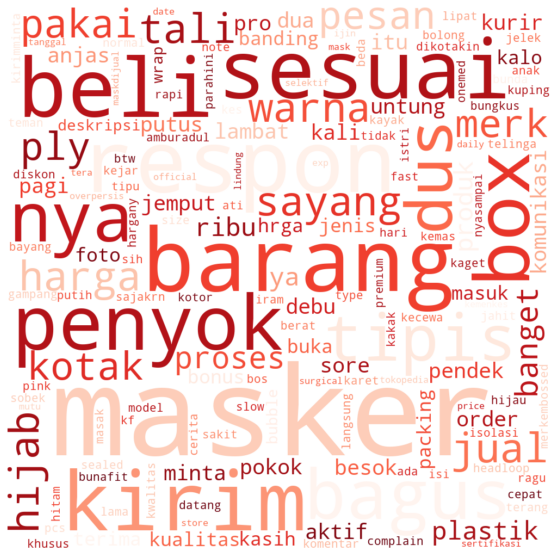

In [24]:
all_text_s0 = ' '.join(word for word in train_s0["Ulasan_clean"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

Dari visualisasi diatas merupakan wordcloud kata yang paling banyak muncul pada isi ulasan yang memiliki label sentimen negatif. Kata yang paling sering muncul dan mengarah ke ulasan negatif membahas seputar : barang, harga, kotak, penyok, box, dus, tipis, putus, sobek, kualitas, karet, bolong dan sebagainya. Sehingga dari kata-kata ini bisa menjadi masukan untuk penjual dan marketplace Tokopedia untuk meningkatkan kualitas barang (produk masker kesehatan), harga, kualitas pengiriman atau pengemasan, serta kualitas produk masker Kesehatan yang paling banyak disebutkan pelanggan dalam hasil Analisa ulasan sentimen yang negatif.

**Ulasan Positif**

In [25]:
train_s1 = data_label[data_label["label"] == 1]

In [26]:
train_s1["Ulasan_clean"] = train_s1["Ulasan_clean"].fillna("tidak ada komentar")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
train_s1

,Nama_Produk,Akun,Ulasan_clean,label
2,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Yati,bagus kirim cepat,1
3,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Husin,barang sesuai pesan,1
4,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Febby,panas pakai,1
6,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Alden,bagus masker,1
7,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Heni,pengirimn cepat produk bagus konsumen suka mak...,1
...,...,...,...,...
294,Buy 1 Get 1 - Masker Primero - Sachet,M***y,top keren,1
297,Buy 1 Get 1 - Masker Primero - Sachet,Teguh,kotak penyok sana mngkn expediai,1
298,Buy 1 Get 1 - Masker Primero - Sachet,F***a,barang sesuai kualitas kardus penyok next time...,1
299,Buy 1 Get 1 - Masker Primero - Sachet,N***a,harga promo murah kirim promo,1


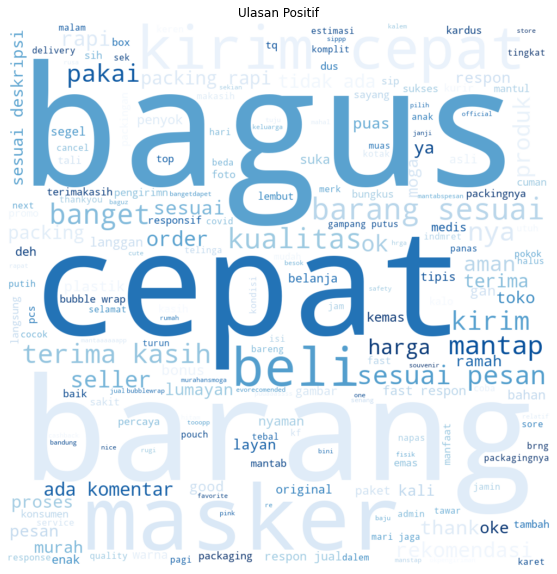

In [28]:
all_text_s1 = ' '.join(word for word in train_s1["Ulasan_clean"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ulasan Positif")
plt.margins(x=0, y=0)
plt.show()

Dari visualisasi diatas merupakan wordcloud kata yang paling banyak muncul pada ulasan yang memiliki label sentimen positif. Kata yang paling sering muncul dan mengarah ke ulasan positif membahas seputar : barang, cepat, bagus, masker, aman, kualitas, sesuai, rapi, respon, aman, recommended, dan sebagainya. Sehingga dari kata-kata ini bisa menjadi masukan untuk penjual dan marketplace Tokopedia untuk menjaga kualitas atau meningkatkan kembali kualitas barang (produk masker kesehatan), kualitas yang sesuai dan aman, serta respon penjual paling banyak disebutkan pelanggan dalam hasil Analisa ulasan sentimen yang positif.

# Menyiapkan Data Train dan Test

Pada proses ini kami menggunakan library sklearn.model_selection dengan modul train_test _split untuk membagi data latih (X_train dan y_train) dan data uji (X_test dan y_test) dengan persentasi data latih 70% dan data uji 30% serta memilih label data yaitu yang merupakan variable independen dari data kami yaitu kolom label untuk dijadikan parameter klasifikasi prediksi.

In [29]:
data_label['Ulasan_clean'] = data_label['Ulasan_clean'].fillna("tidak ada komentar")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_label['Ulasan_clean'], data_label['label'], 
                                                    test_size=0.1, stratify=data_label['label'], random_state=30)

# TF-IDF

Pada proses ini kami menggunakan pembobotan TF-IDF(term frequency–inverse document) untuk menghitung manual dengan menggunakan python pembobotan kata dalam dokumen data ulasan.

In [31]:
import numpy as np

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [33]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(270, 428)
(30, 428)


In [34]:
X_train = X_train.toarray()

In [35]:
X_test = X_test.toarray()

# Machine Learning

In [36]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [37]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#deklarasi metode cross validation
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)
#tuning hyperparameter menggunakan gridsearch

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gscv_nb = GridSearchCV(estimator=nb, 
                 param_grid=params_NB, 
                 cv=cv_method,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 

#Fitting ke Model
gscv_nb.fit(X_train,y_train)
#mendapatkan hyperparameters terbaik
gscv_nb.best_params_

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


{'var_smoothing': 1.0}

In [38]:
nb = GaussianNB(var_smoothing=1.0)

In [39]:
nb.fit(X_train, y_train)

GaussianNB(var_smoothing=1.0)

In [40]:
y_pred_nb = nb.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [42]:
print('--------------------- confusion matrix  ----------------------------')
print(confusion_matrix(y_test, y_pred_nb))
print('--------------------- classification report  ----------------------------')
print(classification_report(y_test, y_pred_nb))

--------------------- confusion matrix  ----------------------------
[[ 0  3]
 [ 1 26]]
--------------------- classification report  ----------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.90      0.96      0.93        27

    accuracy                           0.87        30
   macro avg       0.45      0.48      0.46        30
weighted avg       0.81      0.87      0.84        30



Setelah dilakukan pembagian data latih dan data uji serta pembobotan tf-idf selanjutnya dapat dilakukan proses klasifikasi prediksi menggunakan model algoritma Naïve Bayes seperti proses yang ditunjukkan pada gambar 4. Didapatkan model algoritma Naïve Bayes dapat memberikan akurasi yang cukup baik sampari 87% (0.87).

Hasil penelitian menggunakan Metode Algoritma Naïve Bayes untuk mengetahui sentimen ulasan pengguna dengan klasifikasi 2 kelas positif dan negative dengan pendekatan NLP menghasilkan nilai akurasi sebesar 87%. Selain itu, didapatkan bahwa Analisa Sentimen pada ulasan marketplace Tokopedia pada produk masker kesehatan menunjukan lebih banyak pada ulasan yang positif. Ini berarti pelayanan dan produk masker Kesehatan yang disediakan di marketplace Tokopedia sudah cukup baik.

Dapat disimpulkan hasil scraping yang diperoleh dari produk pencarian masker kesehatan pada Tokopedia menampilkan data yang menunjukan ulasan positif lebih dominan daripada hasil ulasan negatif dan untuk ulasan negatif kata yang paling sering muncul adalah seputar kualitas produk yang tipis,mudah putus, sobek atau bolong, kualitas karetnya dan pada pengemasan yaitu kotak/dus penyok dan untuk analisa positif kata yang paling sering muncul adalah seputar kualitas produk yang sesuai dan rapi, pengiriman yang aman dan cepat dan respon penjual.